In [2]:
import numpy as np
import talib
import pandas as pd
from talib import abstract
import matplotlib.pyplot as plt

In [3]:
close = np.random.random(100)

In [9]:
output = talib.SMA(close)

In [10]:
type(close)

numpy.ndarray

In [11]:
output

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan, 0.42000298,
       0.42620438, 0.41716499, 0.39771481, 0.39792625, 0.42388979,
       0.4382143 , 0.43852767, 0.42354585, 0.40485153, 0.42670158,
       0.43180173, 0.46192163, 0.45406395, 0.45055399, 0.45104028,
       0.44858804, 0.44139656, 0.46716204, 0.48277818, 0.49961805,
       0.51110534, 0.52570483, 0.52300704, 0.50372825, 0.5052303 ,
       0.52882126, 0.51861965, 0.50689851, 0.51871505, 0.52313179,
       0.50366015, 0.5169718 , 0.53427039, 0.52783723, 0.49748989,
       0.49249508, 0.49265197, 0.48668343, 0.50320101, 0.4978911 ,
       0.49890483, 0.47348578, 0.46941708, 0.48527555, 0.49611

In [4]:
new_f100 = pd.read_csv('f100_1070904.csv')

In [17]:
rsi = talib.RSI(v, timeperiod=3)

In [50]:
help(plt.subplots)

Help on function subplots in module matplotlib.pyplot:

subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
    Create a figure and a set of subplots
    
    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.
    
    Parameters
    ----------
    nrows, ncols : int, optional, default: 1
        Number of rows/columns of the subplot grid.
    
    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (`sharex`) or y (`sharey`)
        axes:
    
            - True or 'all': x- or y-axis will be shared among all
              subplots.
            - False or 'none': each subplot x- or y-axis will be
              independent.
            - 'row': each subplot row will share an x- or y-axis.
            - 'col': each subplot column will share an x- or y-axis.
    
        Whe

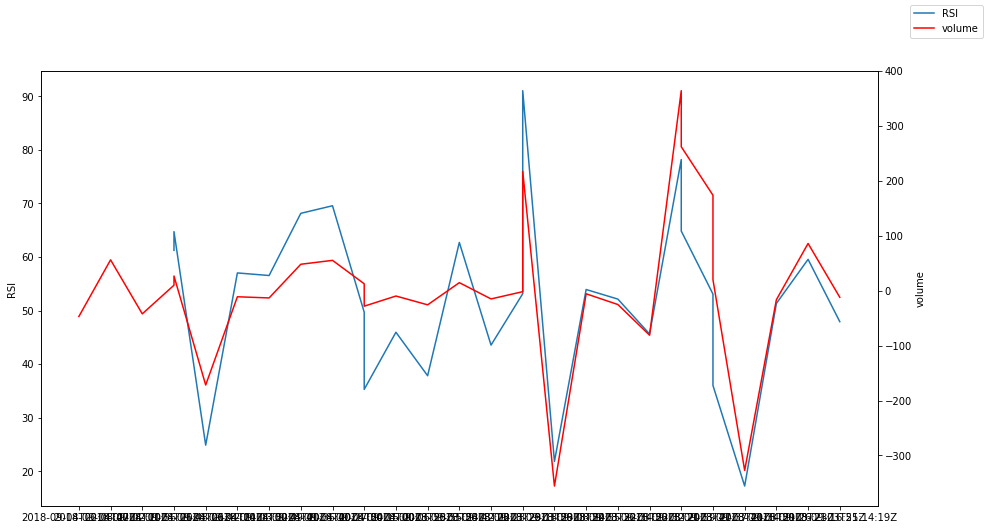

In [54]:
x = new_f100['Time (UTC)'][:30]
y1 = rsi[:30]
y2 = v[:30]

fig, ax1 = plt.subplots(figsize=(15,8))
# plt.plot(v)

ax1.plot(x, y1, label='RSI')
ax1.set_ylabel('RSI')

ax2 = ax1.twinx()  # this is the important function
ax2.plot(x, y2, 'r', label='volume')
# ax2.set_xlim([0, np.e])
ax2.set_ylabel('volume')
ax2.set_xlabel('Same X for both exp(-x) and ln(x)')

fig.legend()

In [56]:
new_f100.columns

Index(['Block', 'Time (UTC)', 'year', 'month', 'date', 'timestamp',
       'Amount (BTC)', 'Balance (BTC)', 'Balance (USD)', 'USD price',
       'address', 'rank'],
      dtype='object')

In [58]:
new_f100.drop(['Balance (BTC)', 'Balance (USD)', 'address'], axis = 1, inplace = True)

In [61]:
volume = np.array(new_f100['Amount (BTC)'],dtype='float')

In [64]:
help(talib.RSI)

Help on function RSI in module talib._ta_lib:

RSI(...)
    RSI(real[, timeperiod=?])
    
    Relative Strength Index (Momentum Indicators)
    
    Inputs:
        real: (any ndarray)
    Parameters:
        timeperiod: 14
    Outputs:
        real



In [126]:
talib.RSI(volume, timeperiod=15)

array([        nan,         nan,         nan, ..., 76.24291628,
       46.35409027, 52.69720385])

In [66]:
new_f100['RSI (3 days)'] = talib.RSI(volume, timeperiod=3)

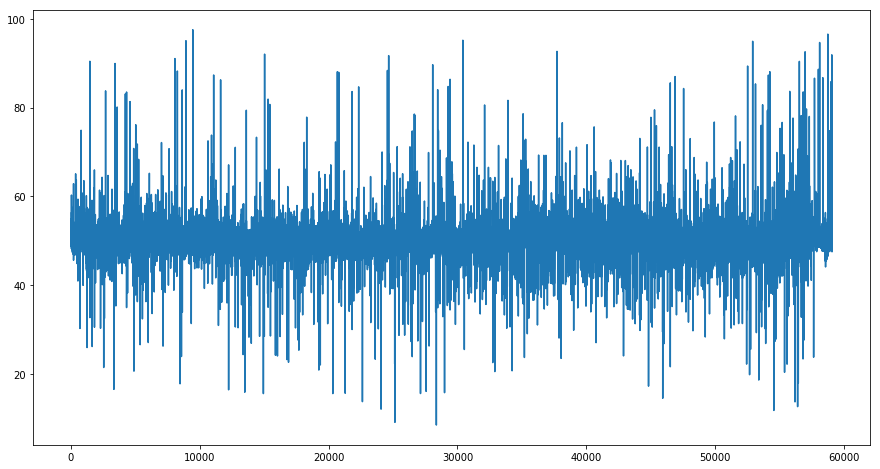

In [140]:
plt.figure(figsize=(15,8))
plt.plot(talib.RSI(np.array(new_f100['Amount (BTC)'],dtype='float'), timeperiod=30), '-')

In [73]:
new_f100.drop('RSI (3 days)', axis = 1, inplace = True)

In [79]:
pd.DataFrame(new_f100.groupby(['timestamp']).sum()['Amount (BTC)']).head()

,Amount (BTC)
timestamp,
20100724,10400.000000
20110301,79956.000000
20110604,0.001000
20110808,10770.515208
20120622,0.031337


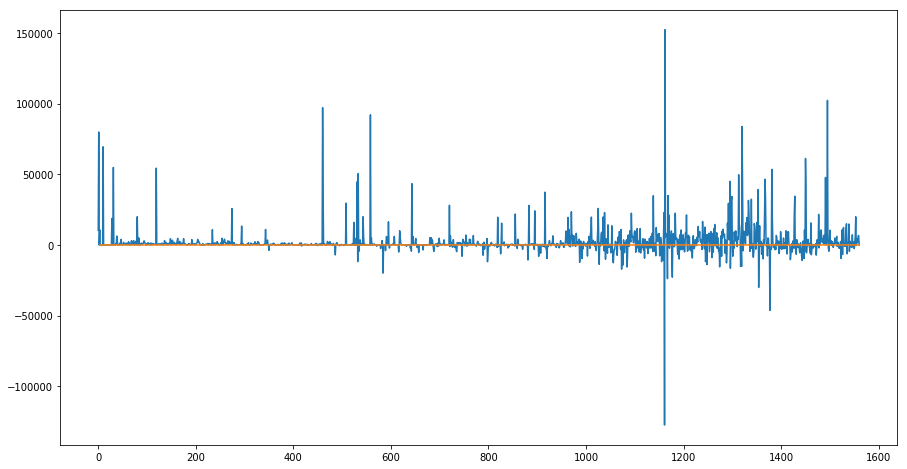

In [98]:
volume_day = new_f100.groupby(['timestamp']).sum()['Amount (BTC)']
plt.figure(figsize=(15,8))
plt.plot(np.array(volume_day))
plt.plot(talib.RSI(np.array(volume_day), timeperiod=3))

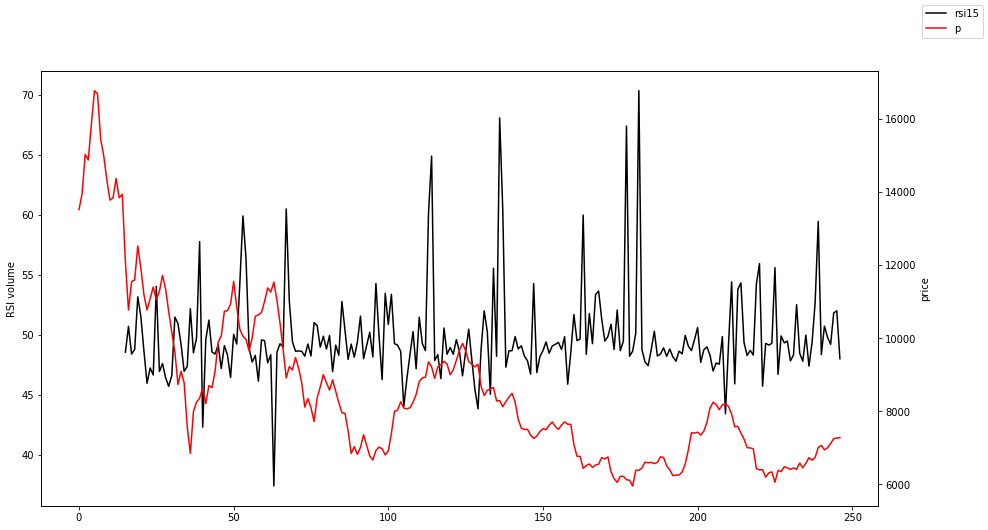

In [125]:
filtered = new_f100[new_f100['timestamp']>20180000].groupby(['timestamp'])
volume_day = filtered.sum()['Amount (BTC)']
# x = volume_day.index
# y1 = np.array(volume_day)
# rsi3 = talib.RSI(np.array(volume_day), timeperiod=3)
# rsi7 = talib.RSI(np.array(volume_day), timeperiod=7)
rsi15 = talib.RSI(np.array(volume_day), timeperiod=15)
price = np.array(filtered.mean()['USD price'])

fig, ax1 = plt.subplots(figsize=(15,8))
# plt.plot(v)

# ax1.plot(rsi3, label='rsi3', color = 'g')
# ax1.plot(rsi7, label='rsi7', color = 'y')
ax1.plot(rsi15, label='rsi15', color = 'k')
ax1.set_ylabel('RSI volume')

ax2 = ax1.twinx()  # this is the important function
ax2.plot(y3, label='p', color = 'r')
# ax2.set_xlim([0, np.e])
ax2.set_ylabel('price')
ax2.set_xlabel('Same X for both exp(-x) and ln(x)')

fig.legend()

In [7]:
df_day = new_f100.groupby(['timestamp'])
volume_day = np.array(df_day.sum()['Amount (BTC)'])
price_day = np.array(df_day.mean()['USD price'])

In [161]:
t = str(list(df_day.groups.keys())[0])
print(t[:4]+'-'+t[4:6]+'-'+t[6:]+'T00:00:00Z')

2010-07-24T00:00:00Z


In [167]:
raw_date = list(df_day.groups.keys())
def f(x):
    t = str(x)
    return t[:4]+'-'+t[4:6]+'-'+t[6:]+'T00:00:00Z'
es_date = list(map(f, list(df_day.groups.keys())))
es_date[:5]

['2010-07-24T00:00:00Z',
 '2011-03-01T00:00:00Z',
 '2011-06-04T00:00:00Z',
 '2011-08-08T00:00:00Z',
 '2012-06-22T00:00:00Z']

In [168]:
rsi6 = talib.RSI(volume_day, timeperiod=6)
rsi9 = talib.RSI(volume_day, timeperiod=9)
rsi15 = talib.RSI(volume_day, timeperiod=15)

In [179]:
t = pd.DataFrame(data = {'es_date':es_date, 'raw_date':raw_date, 'btc_volume':volume_day, 'btc_price':price_day, 
                         'RSI_6':rsi6, 'RSI_9':rsi9, 'RSI_15':rsi15})

In [195]:
def rsi(df):
    import numpy as np
    import talib
    import pandas as pd
    df_day = df.groupby(['timestamp'])
    volume_day = np.array(df_day.sum()['Amount (BTC)'])
    price_day = np.array(df_day.mean()['USD price'])
    raw_date = list(df_day.groups.keys())
    
    def iso_format(x):
        t = str(x)
        return t[:4]+'-'+t[4:6]+'-'+t[6:]+'T00:00:00Z'
    
    es_date = list(map(iso_format, list(df_day.groups.keys())))
    
    rsi6 = talib.RSI(volume_day, timeperiod=6)
    rsi9 = talib.RSI(volume_day, timeperiod=9)
    rsi15 = talib.RSI(volume_day, timeperiod=15)
    
    df_rsi = pd.DataFrame(data = {'es_date':es_date, 'raw_date':raw_date, 'btc_volume':volume_day, 'btc_price':price_day, 
                         'RSI_6':rsi6, 'RSI_9':rsi9, 'RSI_15':rsi15})
    return df_rsi

In [170]:
help(pd.DataFrame)

Help on class DataFrame in module pandas.core.frame:

class DataFrame(pandas.core.generic.NDFrame)
 |  Two-dimensional size-mutable, potentially heterogeneous tabular data
 |  structure with labeled axes (rows and columns). Arithmetic operations
 |  align on both row and column labels. Can be thought of as a dict-like
 |  container for Series objects. The primary pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : numpy ndarray (structured or homogeneous), dict, or DataFrame
 |      Dict can contain Series, arrays, constants, or list-like objects
 |  
 |      .. versionchanged :: 0.23.0
 |         If data is a dict, argument order is maintained for Python 3.6
 |         and later.
 |  
 |  index : Index or array-like
 |      Index to use for resulting frame. Will default to RangeIndex if
 |      no indexing information part of input data and no index provided
 |  columns : Index or array-like
 |      Column labels to use for resulting frame. Will default to
 |      Ran

In [184]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1561 entries, 0 to 1560
Data columns (total 7 columns):
es_date       1561 non-null object
raw_date      1561 non-null int64
btc_volume    1561 non-null float64
btc_price     1561 non-null float64
RSI_6         1555 non-null float64
RSI_9         1552 non-null float64
RSI_15        1546 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 85.4+ KB


In [186]:
t.to_csv('rsi_t.csv', index=False)

In [196]:
btc_rsi = rsi(new_f100)

In [198]:
btc_rsi.head(15)

,es_date,raw_date,btc_volume,btc_price,RSI_6,RSI_9,RSI_15
0,2010-07-24T00:00:00Z,20100724,10400.000000,0.053,NaN,NaN,NaN
1,2011-03-01T00:00:00Z,20110301,79956.000000,0.930,NaN,NaN,NaN
2,2011-06-04T00:00:00Z,20110604,0.001000,17.830,NaN,NaN,NaN
3,2011-08-08T00:00:00Z,20110808,10770.515208,8.890,NaN,NaN,NaN
4,2012-06-22T00:00:00Z,20120622,0.031337,6.490,NaN,NaN,NaN
5,2012-07-15T00:00:00Z,20120715,1.093011,8.090,NaN,NaN,NaN
6,2012-10-23T00:00:00Z,20121023,0.039052,11.650,46.960056,NaN,NaN
7,2013-01-25T00:00:00Z,20130125,0.001000,17.170,46.960043,NaN,NaN
8,2013-02-01T00:00:00Z,20130201,14.355700,20.030,46.966452,NaN,NaN
9,2013-02-03T00:00:00Z,20130203,0.000008,20.120,46.959642,46.960555,NaN


In [205]:
def talib2df(talib_output):
    if type(talib_output) == list:
        ret = pd.DataFrame(talib_output).transpose()
#         print('list')
    else:
        ret = pd.Series(talib_output)
        print('not list')
    ret.index = btc_tech['close'].index
    ret.columns = ['K']
    return ret;

In [207]:
volume_day

array([ 1.04000000e+04,  7.99560000e+04,  1.00000000e-03, ...,
        6.40572599e+03,  6.74034496e+03, -1.14192535e+02])

In [209]:
help(talib.abstract.STOCH)

Help on Function in module talib._ta_lib object:

class Function(builtins.object)
 |  This is a pythonic wrapper around TALIB's abstract interface. It is
 |  intended to simplify using individual TALIB functions by providing a
 |  unified interface for setting/controlling input data, setting function
 |  parameters and retrieving results. Input data consists of a ``dict`` of
 |  ``numpy`` arrays (or a ``pandas.DataFrame``), one array for each of open,
 |  high, low, close and volume. This can be set with the set_input_arrays()
 |  method. Which keyed array(s) are used as inputs when calling the function
 |  is controlled using the input_names property.
 |  
 |  This class gets initialized with a TALIB function name and optionally an
 |  input_arrays object. It provides the following primary functions for
 |  setting inputs and retrieving results:
 |  
 |  ---- input_array/TA-function-parameter set-only functions -----
 |  - set_input_arrays(input_arrays)
 |  - set_function_args([input_

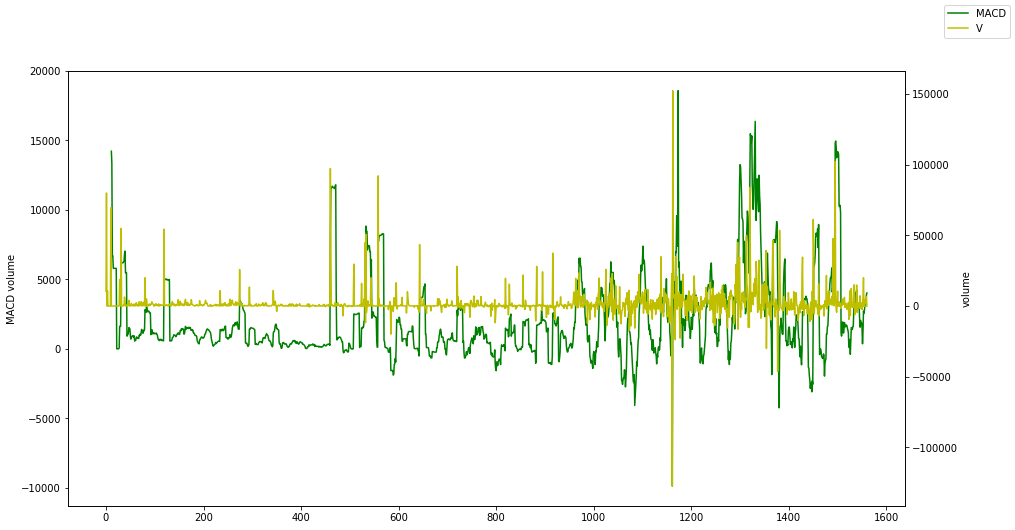

In [222]:
fig, ax1 = plt.subplots(figsize=(15,8))

ax1.plot(talib.SMA(volume_day, timeperiod=12), label='MACD', color='g')
ax1.set_ylabel('MACD volume')

ax2 = ax1.twinx()
ax2.plot(volume_day, label='V', color='y')
ax2.set_ylabel('volume')

fig.legend()

In [70]:
def ema(start, end):
    fig, ax1 = plt.subplots(figsize=(15,8))
    v_range = volume_day[start:end]
    ema12 = talib.EMA(v_range, timeperiod=12)
    ema26 = talib.EMA(v_range, timeperiod=26)
    dif = ema12 - ema26
    macd = talib.EMA(dif, timeperiod=9)
    ax1.plot(dif, label='dif')
    ax1.plot(macd, label='macd')
    ax1.set_ylabel('MACD volume')
    
    ax2 = ax1.twinx()
    ax2.plot(price_day[start:end], label='p', color='y')
    ax2.set_ylabel('price')
    fig.legend(loc='best')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/legend.py:651: UserWarning: Automatic legend placement (loc="best") not implemented for figure legend. Falling back on "upper right".
  warnings.warn('Automatic legend placement (loc="best") not '


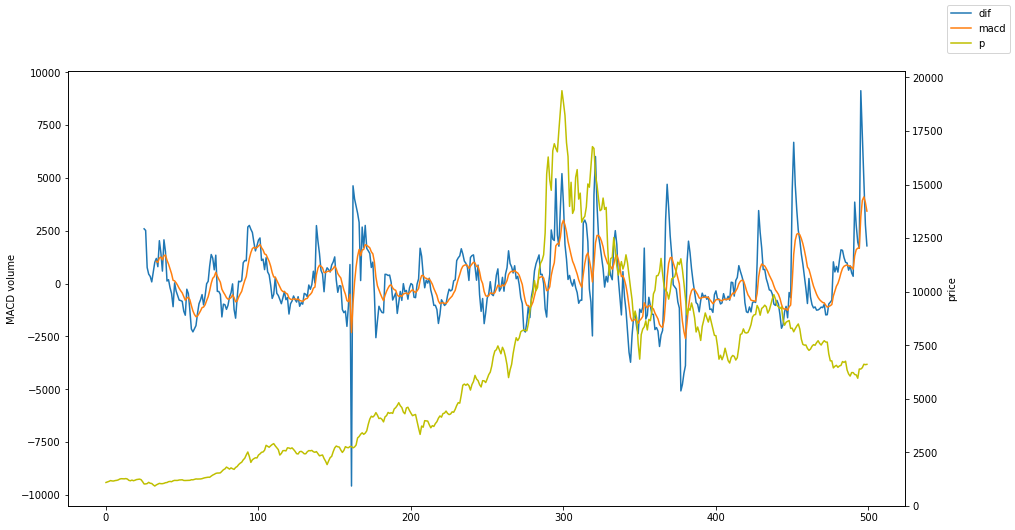

In [71]:
ema(1000,1500)

In [38]:
help(talib.STOCH)

Help on function STOCH in module talib._ta_lib:

STOCH(...)
    STOCH(high, low, close[, fastk_period=?, slowk_period=?, slowk_matype=?, slowd_period=?, slowd_matype=?])
    
    Stochastic (Momentum Indicators)
    
    Inputs:
        prices: ['high', 'low', 'close']
    Parameters:
        fastk_period: 5
        slowk_period: 3
        slowk_matype: 0
        slowd_period: 3
        slowd_matype: 0
    Outputs:
        slowk
        slowd



In [39]:
kd = talib.STOCH(high=volume_day, 
                low=volume_day, 
                close=volume_day,
                fastk_period=9,
               slowk_period=3,
               slowk_matype=0,
               slowd_period=3,
               slowd_matype=0
)

In [40]:
kd

(array([        nan,         nan,         nan, ..., 27.13899694,
        30.99245727, 25.25300907]),
 array([        nan,         nan,         nan, ..., 24.38040288,
        27.51027476, 27.79482109]))

In [50]:
def kd_series(start, end, k_range):
    fig, ax1 = plt.subplots(figsize=(15,8))
    v_range = volume_day[start:end]
    k, d = talib.STOCH(high=v_range, 
                low=v_range, 
                close=v_range,
                fastk_period=k_range,
                slowk_period=3,
                slowd_period=3
    )
    ax1.plot(k, label='k')
    ax1.plot(d, label='d')
    ax1.set_ylabel('KD volume')
    
    ax2 = ax1.twinx()
    ax2.plot(price_day[start:end], label='p', color='y')
    ax2.set_ylabel('price')
    fig.legend(loc='best')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/legend.py:651: UserWarning: Automatic legend placement (loc="best") not implemented for figure legend. Falling back on "upper right".
  warnings.warn('Automatic legend placement (loc="best") not '


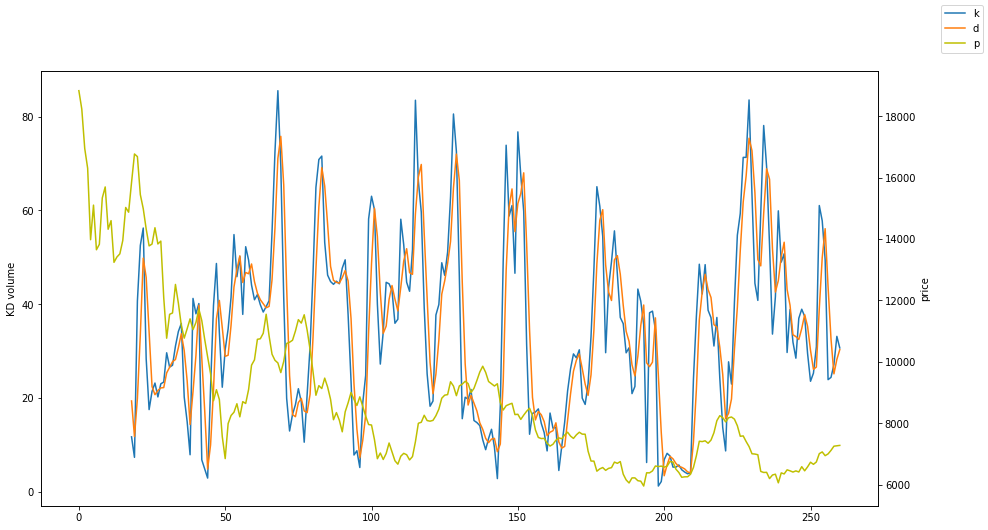

In [61]:
kd_series(1300, 1600, 15)

In [63]:
def technical(df, rsi_range1=6, rsi_range2=9, rsi_range3=15, kd_range=9):
    import numpy as np
    import talib
    import pandas as pd
    df_day = df.groupby(['timestamp'])
    volume_day = np.array(df_day.sum()['Amount (BTC)'])
    price_day = np.array(df_day.mean()['USD price'])
    raw_date = list(df_day.groups.keys())
    
    def iso_format(x):
        t = str(x)
        return t[:4]+'-'+t[4:6]+'-'+t[6:]+'T00:00:00Z'
    
    es_date = list(map(iso_format, list(df_day.groups.keys())))
    
    rsi1 = talib.RSI(volume_day, timeperiod=rsi_range1)
    rsi2 = talib.RSI(volume_day, timeperiod=rsi_range2)
    rsi3 = talib.RSI(volume_day, timeperiod=rsi_range3)
    
    k, d = talib.STOCH(high=volume_day, 
                low=volume_day, 
                close=volume_day,
                fastk_period=kd_range,
                slowk_period=3,
                slowd_period=3
    )
    
    df_technical = pd.DataFrame(data = {'es_date':es_date, 'raw_date':raw_date, 'btc_volume':volume_day, 'btc_price':price_day, 
                         'RSI_{}'.format(rsi_range1):rsi1, 
                         'RSI_{}'.format(rsi_range2):rsi2, 
                         'RSI_{}'.format(rsi_range3):rsi3, 
                         'K_{}'.format(kd_range):k, 'D_{}'.format(kd_range):d
                                 })
    return df_technical

In [67]:
df_rsi_kd = technical(new_f100)
df_rsi_kd.to_csv('rsi_kd.csv', index=False)

In [65]:
def pd_elastic(df):
    from espandas import Espandas
    df['indexId'] = (df.index).astype(str)
    INDEX = input('index name: ')
    TYPE = input('type name: ')
    esp = Espandas()
    esp.es_write(df, INDEX, TYPE)

In [69]:
pd_elastic(df_rsi_kd)

index name: rsi_kd_index
type name: rsi_kd_type
index does not exist, creating index


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/espandas/espandas.py:85: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  df = df.reindex_axis(sorted(df.columns), axis=1)
